# Gaussian impurity with self consistency

In [1]:
import kwant
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from amsc import (
    bulk_amsc_system,
    generate_intial_Delta,
    setup_gaussian_impurities,
)
from plot_tools import add_tl_label, complex_plot
from tqdm.notebook import tqdm
from pauli import *
from qm_tools import sort_eigensystem
from qm_tools import sparse_diag
from scipy.interpolate import RegularGridInterpolator

In [2]:
# eigsh = sla.eigsh
eigsh = sparse_diag

In [3]:
plt.style.use("../plot_style.mplstyle")

In [4]:
periodic_bc = False

Nx = 61
Ny = 61

x_ax = np.linspace(-(Nx // 2), (Nx // 2), Nx)
y_ax = np.linspace(-(Ny // 2), (Ny // 2), Ny)
x, y = np.meshgrid(x_ax, y_ax)

t = 5.0
t_so = 0.0 * t
t_am = 0.25 * t

mu = 2.5
hz0 = 1e-6
hx0 = 0
hy0 = 0

Delta_init = 1

In [5]:
Vss = np.arange(8, 25.5, 0.5)
NVs = len(Vss)

N = 1024
Nl = 128

In [6]:
Delta_ns = np.zeros((NVs, Nx * Ny)) * np.nan
theta_ns = np.zeros((NVs, Nx * Ny)) * np.nan
wss = np.zeros((NVs, Nl)) * np.nan
vss = np.zeros((NVs, 4 * Nx * Ny, Nl), dtype=complex) * np.nan

In [7]:
for i, Vs in tqdm(enumerate(Vss), total=len(Vss)):
    print(f"V = {-Vs}")
    # Load the .npz file
    try:
        file_path = f"./data/data_V{int(Vss[i]*10):03d}.npz"
        data = np.load(file_path)

        central_start = (N - Nl) // 2
        central_end = central_start + Nl

        # Extract the arrays from the file
        Delta_ns[i] = data["Delta"]
        theta_ns[i] = data["theta"]
        vss[i] = data["vs"][:, central_start:central_end]
        wss[i] = data["ws"][central_start:central_end]
    except:
        pass

  0%|          | 0/35 [00:00<?, ?it/s]

V = -8.0
V = -8.5
V = -9.0
V = -9.5
V = -10.0
V = -10.5
V = -11.0
V = -11.5
V = -12.0
V = -12.5
V = -13.0
V = -13.5
V = -14.0
V = -14.5
V = -15.0
V = -15.5
V = -16.0
V = -16.5
V = -17.0
V = -17.5
V = -18.0
V = -18.5
V = -19.0
V = -19.5
V = -20.0
V = -20.5
V = -21.0
V = -21.5
V = -22.0
V = -22.5
V = -23.0
V = -23.5
V = -24.0
V = -24.5
V = -25.0


In [82]:
idxp = np.argmin(abs(Vss - 14))
Delta1 = Delta_ns[idxp].reshape(Nx, Ny) * np.exp(1j * theta_ns[idxp].reshape(Nx, Ny)).real
idxp = np.argmin(abs(Vss - 15.5))
Delta2 = Delta_ns[idxp].reshape(Nx, Ny) * np.exp(1j * theta_ns[idxp].reshape(Nx, Ny)).real
idxp = np.argmin(abs(Vss - 19))
Delta3 = Delta_ns[idxp].reshape(Nx, Ny) * np.exp(1j * theta_ns[idxp].reshape(Nx, Ny)).real

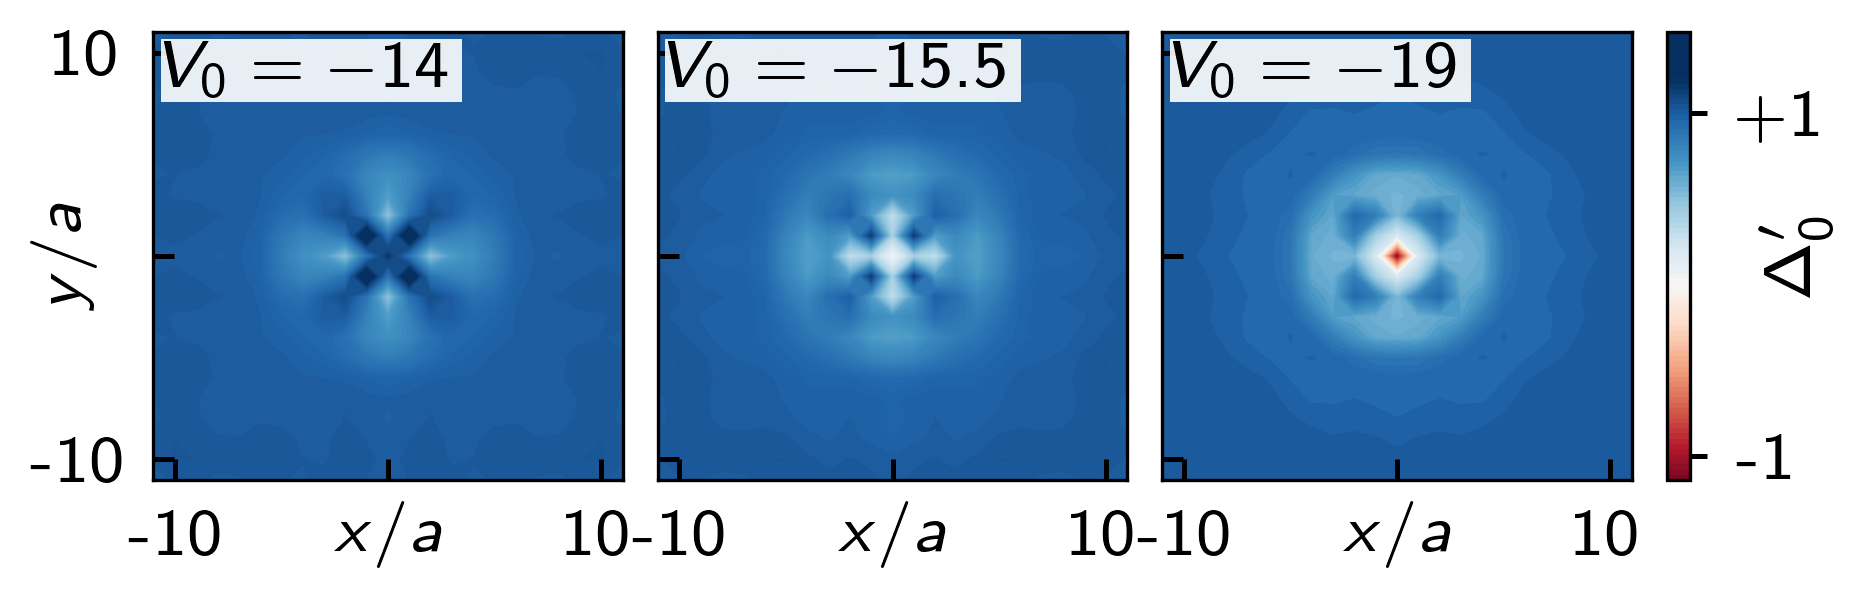

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(3.2, 0.9), ncols=3, sharex=True, sharey=True)

im1 = ax1.contourf(x, y, Delta1, cmap="RdBu", levels=101, norm=mpl.colors.CenteredNorm(0, 1.2))
im2 = ax2.contourf(x, y, Delta2, cmap="RdBu", levels=101, norm=mpl.colors.CenteredNorm(0, 1.2))
im3 = ax3.contourf(x, y, Delta3, cmap="RdBu", levels=101, norm=mpl.colors.CenteredNorm(0, 1.2))

ax2.set_xticks([-10, 0, 10], labels=["-10", "", "10"])
ax2.set_yticks([-10, 0, 10], labels=["-10", "", "10"])

ax2.set_xlim(-11, 11)
ax2.set_ylim(-11, 11)

ax1.set_ylabel(r"$y/a$", labelpad=-8)
ax1.set_xlabel(r"$x/a$", labelpad=-8)
ax2.set_xlabel(r"$x/a$", labelpad=-8)
ax3.set_xlabel(r"$x/a$", labelpad=-8)

add_tl_label(ax1, r"$V_0 = -14$")
add_tl_label(ax2, r"$V_0 = -15.5$")
add_tl_label(ax3, r"$V_0 = -19$")

ax1.set_rasterized(True)
ax2.set_rasterized(True)
ax3.set_rasterized(True)

fig.tight_layout(pad=0)

cbar = fig.colorbar(im3, ax = [ax1, ax2, ax3], pad=0.02)
cbar.set_ticks([-1, +1], labels=["-1", "+1"])
cbar.ax.tick_params(axis='both', which='both', length=2, direction="out")
cbar.set_label(r"$\Delta_0'$", labelpad=-8)

fig.savefig("./imgs/Fig3-Delta.svg", dpi=600, bbox_inches="tight")

In [8]:
idxp = np.argmin(abs(Vss - 19))

Delta_n = Delta_ns[idxp].reshape(Nx, Ny)
theta_n = theta_ns[idxp].reshape(Nx, Ny)

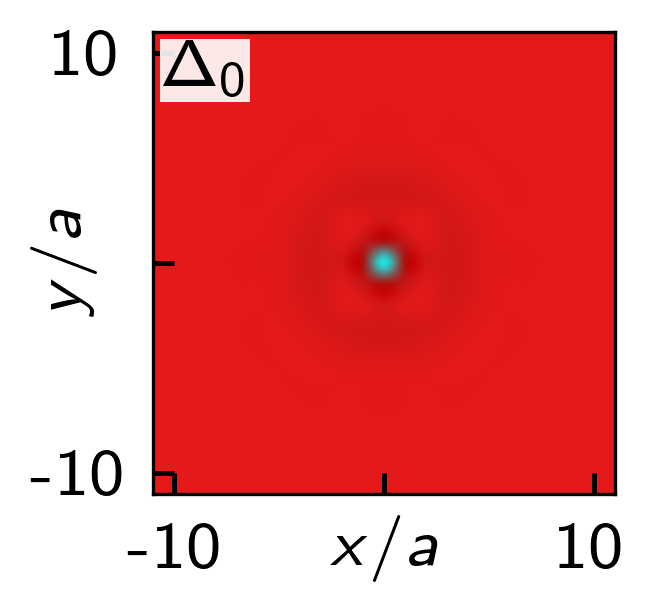

In [11]:
fig, ax = plt.subplots(figsize=(1, 1))

complex_plot(
    x,
    y,
    Delta_n * np.exp(1j * theta_n),
    ax=ax,
    interpolation="spline16",
)

add_tl_label(ax, r"$\Delta_0$")


ax.set_xticks([-10, 0, 10], labels=["-10", "", "10"])
ax.set_yticks([-10, 0, 10], labels=["-10", "", "10"])

ax.set_xlim(-11, 11)
ax.set_ylim(-11, 11)

ax.set_xlabel(r"$x/a$", labelpad=-8)
ax.set_ylabel(r"$y/a$", labelpad=-8)

ax.set_rasterized(True)

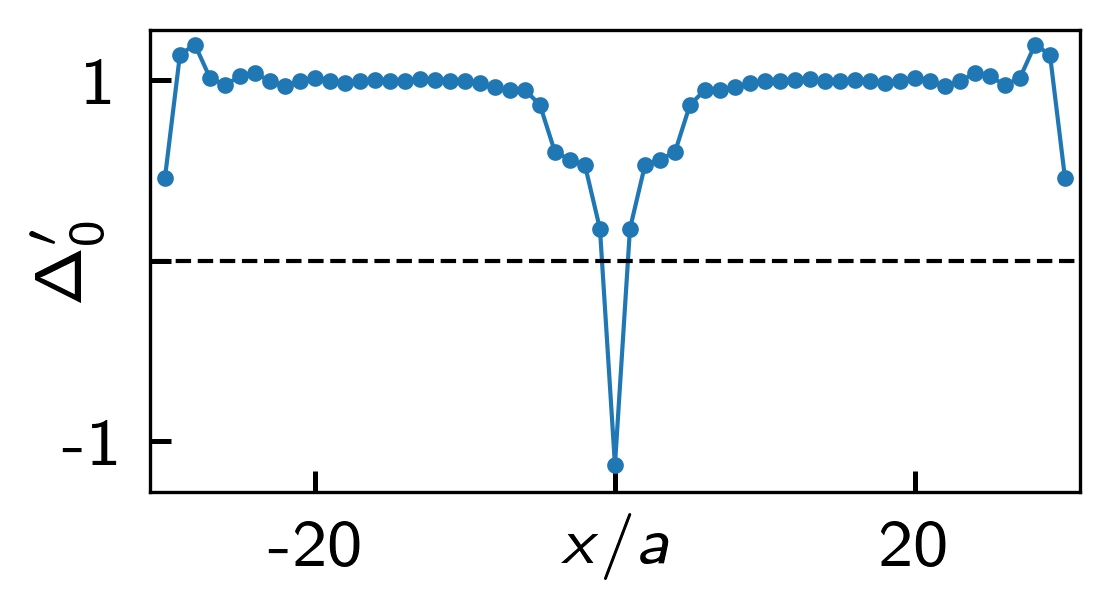

In [12]:
fig, ax1 = plt.subplots(nrows=1, figsize=(2, 1.0))
ax1.plot(x_ax, np.real(Delta_n[Ny // 2] * np.exp(1j * theta_n[Ny // 2])), ".-C0")
ax1.hlines(0, -60, 60, color="black", linestyles="dashed")


ax1.set_yticks([-1, 0, 1], labels=["-1", "", "1"])
ax1.set_xticks([-20, 0, 20], labels=["-20", "", "20"])

ax1.set_ylim(-1.28, 1.28)
ax1.set_xlim(-31, 31)
ax1.set_ylabel(r"$\Delta_0'$", labelpad=-5)
ax1.set_xlabel(r"$x/a$", labelpad=-8)

In [37]:
wso, vso = sort_eigensystem(wss, vss)

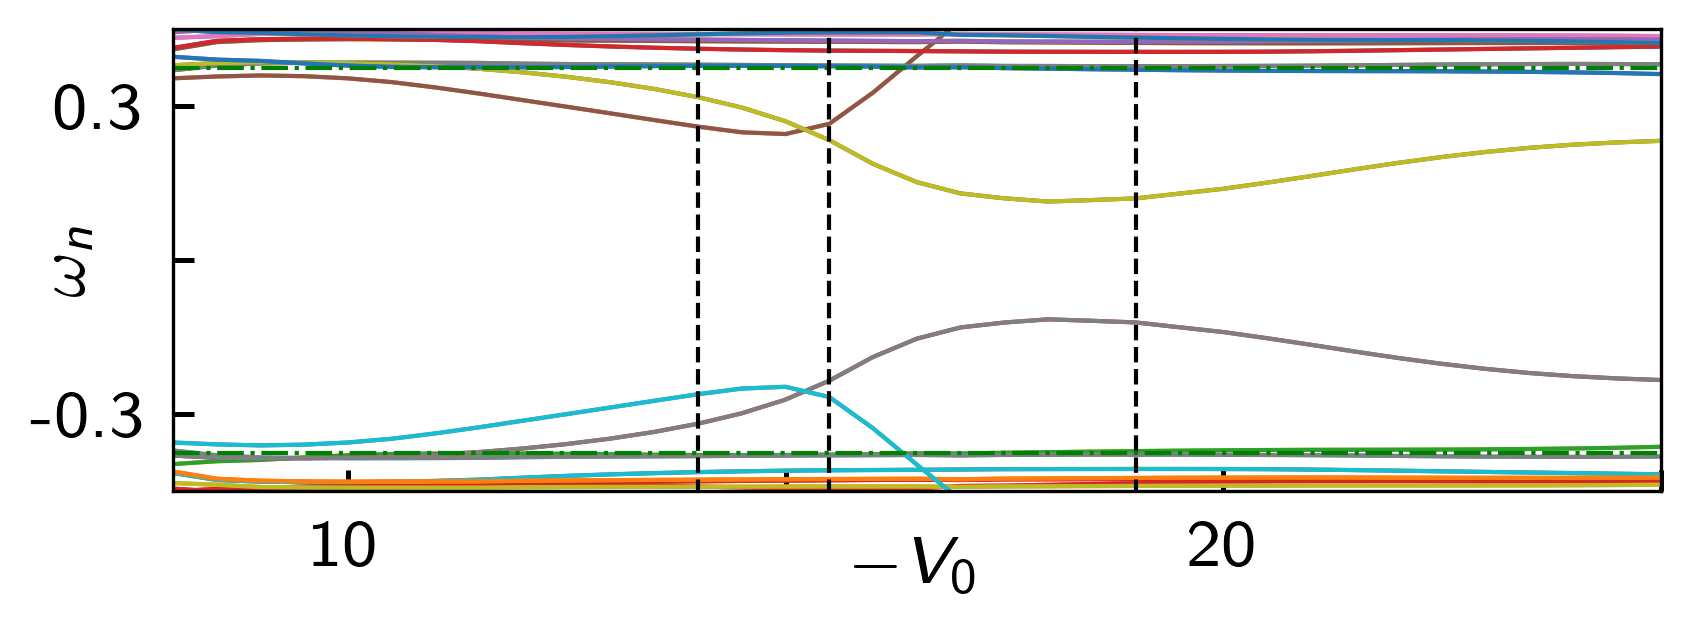

In [110]:
fig, ax = plt.subplots(figsize=(3.2, 1.0))

ri = np.linspace(0, 1, Nl)
np.random.shuffle(ri)
linecolors = mpl.cm.tab10(ri)

for i in range(Nl):
    ax.plot(Vss, wso[:, i], color=linecolors[i], marker="")


ax.plot(Vss, Delta_init - mu * t_am / t - 0 * abs(Vss), "-.", color="green")
ax.plot(Vss, -Delta_init + mu * t_am / t + 0 * abs(Vss), "-.", color="green")

ax.set_xticks([10, 15, 20, 25], labels=["10", "", "20", ""])
ax.set_yticks([-0.3, 0, 0.3], labels=["-0.3", "", "0.3"])

ax.set_xlabel(r"$-V_0$", labelpad=-5)
ax.set_ylabel(r"$\omega_n$", labelpad=-8)

ax.set_ylim(-0.45, 0.45)
ax.set_xlim(8, 25)

ax.vlines([14, 15.5, 19], -0.5, 0.5, colors="k", linestyles="--")

fig.savefig("./imgs/Fig3-sc_spectrum.svg", dpi=600, bbox_inches="tight")